<a href="https://colab.research.google.com/github/kithmini-wijesiri/SMILES/blob/main/curse_of_dimensionality_and_zero_order_optimization_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **curse of dimensionality and zero-order optimization algorithms**

##**Minimizing a quadratic function and the curse of dimensionality**

Consider the simple quadratic function
\begin{equation}
\begin{array}
\
g(w) = w^T w
\end{array}
\end{equation}
whose minimum is always at the origin regardless of the input dimension $N$.

We can create a range of these quadratics for input dimension $N = 1$ to $N=100$, sample the input space of each $P = 100$ times randomly on the hypercube $[-1,1]\times [-1, 1] \times \ldots \times [-1,1]$ (this hypercube has $N$ sides), and plot the minimum value attained for each quadratic against the input dimenionsion $N$.

In [ ]:
import numpy as np
np.random.seed(0)

In [ ]:
# define the function g
g = lambda w: np.dot(w.T,w)

In [ ]:
# implement the function xmins, which takes one argument P, the number of samples from the hypercube,
# and returns the minimum values of g among these P samples
# for dimension N = 1, 2, ..., 100.
def xmins(P):
  xmins = []
  for N in range(1,101):
   w = np.random.uniform(-1, 1, (P, N))
   g_values = np.array([g(w[i]) for i in range(P)])
   xmins.append(np.min(g_values))
  return np.array(xmins)

In [ ]:
# get the results from P = 100, 1000, and 10000
xmins_100 = xmins(100)
xmins_1000 = xmins(1000)
xmins_10000 = xmins(10000)

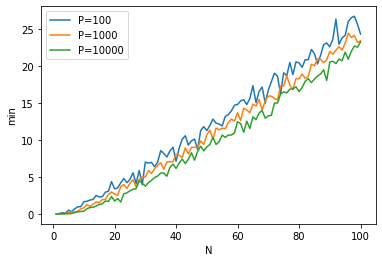

In [ ]:
# plot the results
import matplotlib.pyplot as plt

plt.plot(np.arange(1,101), xmins_100);
plt.plot(np.arange(1,101), xmins_1000);
plt.plot(np.arange(1,101), xmins_10000);
plt.xlabel("N");
plt.ylabel("min");
plt.legend(["P=100", "P=1000", "P=10000"]);

##**Minimizing a simple quadratic using random search**

In this problem, we run random local search for $K=5$ steps with $\alpha = 1$ for all steps, at each step searching for $P = 1000$ random directions to minimize the quadratic function
$g(w_1, w_2) = w^2_1 + w^2_2 + 2$.


In [ ]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice

        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))

        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms

        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions

        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]

            # take step
            w = w + alpha*d

    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In the following coding block, we first define the function g. And then we use $\alpha = 1, w_0 = [3\:4]^T, P = 1000$, and $K=5$ steps to call the random_search function.

In [ ]:
# define function
#defining function g=wTw+2#
import numpy as np
g = lambda w: np.dot(w.T,w) + 2
# run random search algorithm
alpha_choice = 1 ; w =  np.array([3,4]); num_samples = 1000 ; max_its = 5 ;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

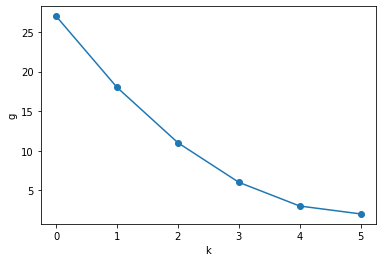

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history, '-o');
plt.xlabel("k");
plt.ylabel("g");


## **Random search with diminishing steplength**

In this problem, we use random search and a diminishing steplength to minimize the Rosenbrock function $g(w_1, w_2) = 100(w_2-w_1^2)^2 + (w_1\: -1)^2$. This function has a global minimum at the point $w^* = [1\: 1]^T$ located in a very narrow and curved valley.

Here, we make two runs of random search using $P = 1000$, the initial point $w^0 = [-2\: -2]^T$, and $K = 50$ steps. With the first run we use a fixed steplength $\alpha = 1$, and with the second run a diminishing steplength. Then we compare the two runs by plotting log of the cost function.


In [ ]:
# define the runction g
g = lambda w: 100*(w[1] - w[0]**2)**2 + (w[0] - 1) ** 2

In [ ]:
# run random search algorithm
alpha_choice = 1; w = np.array([-2,-2]) ; num_samples = 1000; max_its = 50;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

In [ ]:
# run random search algorithm
alpha_choice = 'diminishing'; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;
weight_history1,cost_history1 = random_search(g,alpha_choice,max_its,w,num_samples)

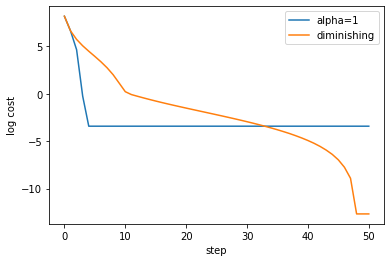

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cost_history)));
plt.plot(np.log(np.array(cost_history1)));
plt.xlabel("step");
plt.ylabel("log cost");
plt.legend(["alpha=1", "diminishing"]);

##**Coordinate search applied to minimize a simple quadratic**

Compare the results from random search algorithm and cooridnate search algorithm on the following simple quadratic
$g(w_1, w_2) = w^2_1 + w^2_2 + 2.$

In [ ]:
# zero order coordinate search
def coordinate_search(g,alpha_choice,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)

    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice

        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))

        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions

        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]

            # take step
            w = w + alpha*d

    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

For both algorithms, we use $w^0 = [3 \: 4]^T, \alpha = 1, P = 10000$ and $K = 10$.

In [ ]:
# define function
import numpy as np
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm
alpha_choice = 1 ; w = np.array([3,4]); num_samples = 10000; max_its = 10 ;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)

# run coordinate search algorithm
alpha_choice = 1 ; w = np.array([3,4]); max_its = 10;
weight_history_2,cost_history_2 = coordinate_search(g,alpha_choice,max_its,w)

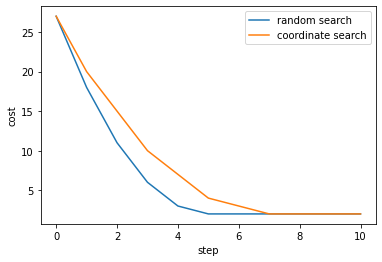

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.xlabel("step");
plt.ylabel("cost");
plt.legend(["random search", "coordinate search"]);

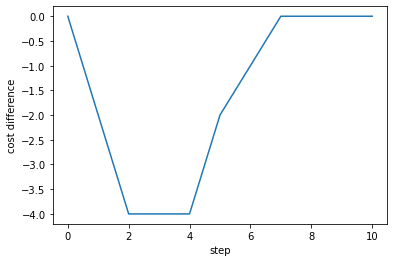

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.array(cost_history_1)-np.array(cost_history_2));
plt.xlabel("step");
plt.ylabel("cost difference");

##**Coordinate search versus coordinate descent**

Apply the coordinate search and coordinate descent algorithm on function $g(w_1, w_2) = 0.26(w^2_1 + w^2_2) - 0.48w_1w_2$. Use diminishing steplength for both algorithms. And use $w_0 = [3\:4]^T $, and $K=40$ steps.

In [ ]:
# zero order coordinate search
def coordinate_descent_zero_order(g,alpha_choice,max_its,w):
    # run coordinate search
    N = np.size(w)
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice

        # random shuffle of coordinates
        c = np.random.permutation(N)

        # forming the dirction matrix out of the loop
        cost = g(w)

        # loop over each coordinate direction
        for n in range(N):
            direction = np.zeros((N,1)).flatten()
            direction[c[n]] = 1

            # record weights and cost evaluation
            weight_history.append(w)
            cost_history.append(cost)

            # evaluate all candidates
            evals =  [g(w + alpha*direction)]
            evals.append(g(w - alpha*direction))
            evals = np.array(evals)

            # if we find a real descent direction take the step in its direction
            ind = np.argmin(evals)
            if evals[ind] < cost_history[-1]:
                # take step
                w = w + ((-1)**(ind))*alpha*direction
                cost = evals[ind]

    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
# define function
import numpy as np
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run coordinate search algorithm
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 100;
weight_history_1,cost_history_1 = coordinate_search(g,alpha_choice,max_its,w)

# run coordinate descent algorithm
alpha_choice = 'diminishing'; w = np.array([3,4]) ; max_its = 40 ;
weight_history_2,cost_history_2 = coordinate_descent_zero_order(g,alpha_choice,max_its,w)

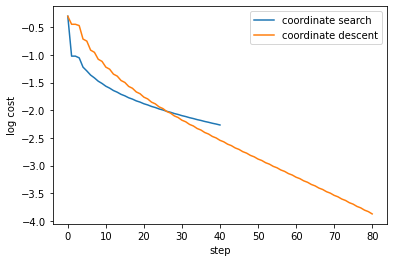

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cost_history_1)));
plt.plot(np.log(np.array(cost_history_2)));
plt.xlabel("step");
plt.ylabel("log cost");
plt.legend(["coordinate search", "coordinate descent"]);